<a href="https://colab.research.google.com/github/tapasyadimree/stockForecasting/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

load apple stock price data

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Apple.csv")
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,0.936384,1.004464,0.907924,0.999442,0.850643,535796800,2000-01-03
1,0.966518,0.987723,0.903460,0.915179,0.778926,512377600,2000-01-04
2,0.926339,0.987165,0.919643,0.928571,0.790324,778321600,2000-01-05
3,0.947545,0.955357,0.848214,0.848214,0.721931,767972800,2000-01-06
4,0.861607,0.901786,0.852679,0.888393,0.756127,460734400,2000-01-07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5839 non-null   float64
 1   High       5839 non-null   float64
 2   Low        5839 non-null   float64
 3   Close      5839 non-null   float64
 4   Adj Close  5839 non-null   float64
 5   Volume     5839 non-null   int64  
 6   Date       5839 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 319.4+ KB


In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5.839000e+03
mean,30.964461,31.318350,30.619127,30.982545,29.763246,4.112873e+08
std,44.291183,44.842037,43.768914,44.328922,44.158932,3.867277e+08
min,0.231964,0.235536,0.227143,0.234286,0.199405,3.519590e+07
25%,1.931965,1.955714,1.897143,1.925714,1.639011,1.384356e+08
50%,13.321429,13.523214,13.160357,13.358929,11.370029,2.942240e+08
75%,36.438751,36.795000,36.237501,36.577499,34.384544,5.476394e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,7.421641e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       5839 non-null   float64       
 1   High       5839 non-null   float64       
 2   Low        5839 non-null   float64       
 3   Close      5839 non-null   float64       
 4   Adj Close  5839 non-null   float64       
 5   Volume     5839 non-null   int64         
 6   Date       5839 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 319.4 KB


**ARIMA forecasting**

In [ ]:
df.set_index('Date', inplace = True)
df.sort_index(inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.850643,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.778926,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.790324,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.721931,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.756127,460734400


In [ ]:
#Test for staionarity
def test_stationarity(y):
    #Determing rolling statistics
    rolmean = y.rolling(12).mean()
    rolstd = y.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(y, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(y,autolag='AIC')

    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

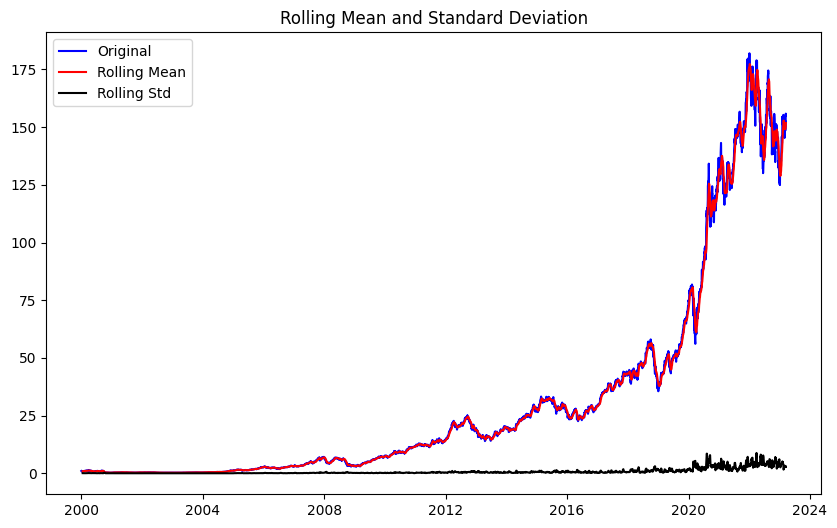

Results of dickey fuller test
Test Statistics                   1.564194
p-value                           0.997746
No. of lags used                 34.000000
Number of observations used    5804.000000
critical value (1%)              -3.431477
critical value (5%)              -2.862038
critical value (10%)             -2.567035
dtype: float64


In [ ]:
y = df['Close']
test_stationarity(y)

<Figure size 1000x600 with 0 Axes>

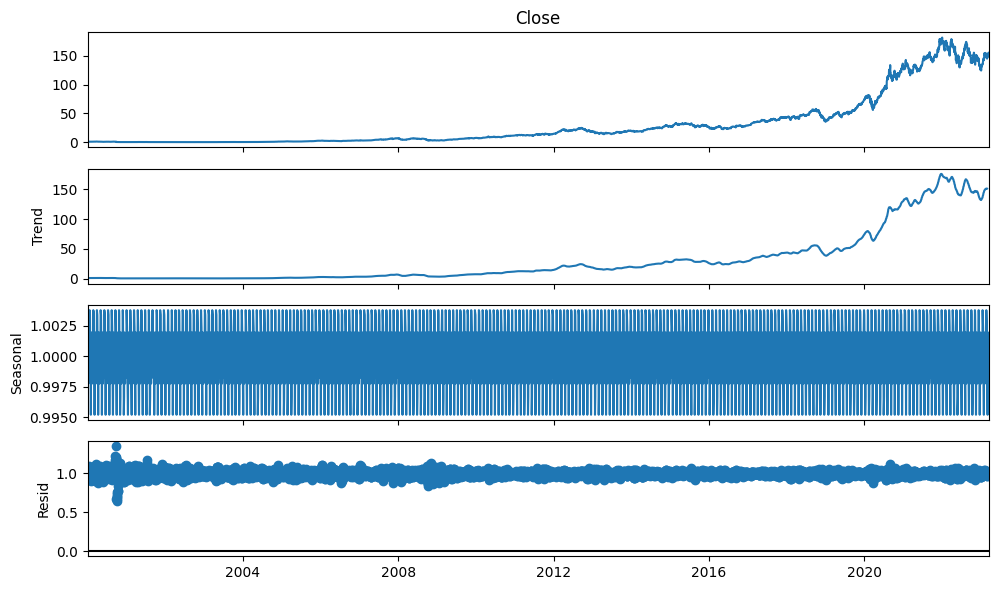

In [ ]:
# Assuming your time series data is stored in 'y'
result = seasonal_decompose(y, model='multiplicative', period=24)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10, 6)

In [ ]:
df_log = np.log(y)

Text(0, 0.5, 'Close Prices')

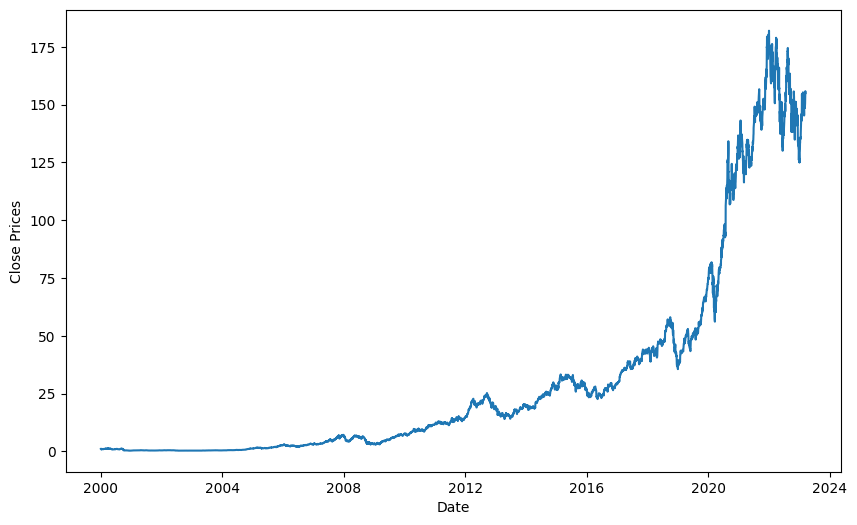

In [ ]:
plt.plot(y)
plt.xlabel('Date')
plt.ylabel('Close Prices')

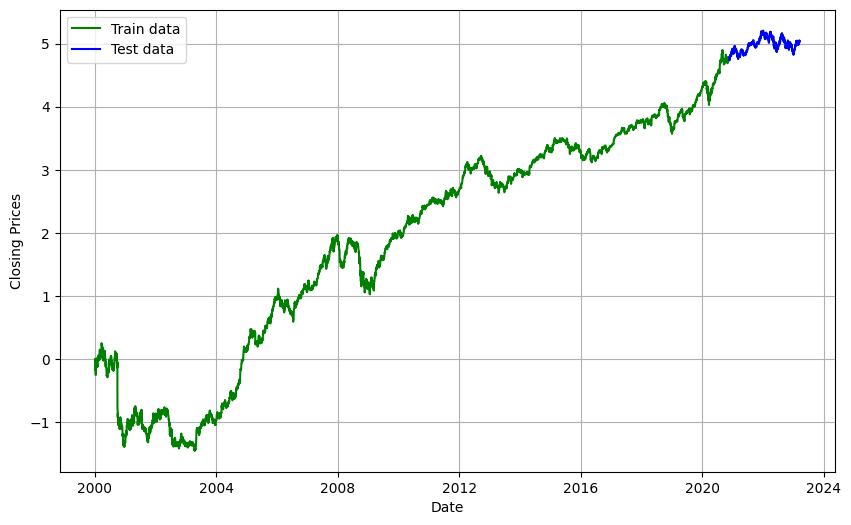

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-23200.478, Time=0.69 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-23207.217, Time=0.57 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-23207.237, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-23195.905, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-23205.230, Time=1.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-23205.200, Time=2.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-23203.239, Time=4.80 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-23202.094, Time=1.85 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 12.863 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5252
Model:               SARIMAX(0, 1, 1)   Log Likelihood               11606.619
Date:                Mon, 13 Nov 2023   AIC                         -23207.237
Time:              

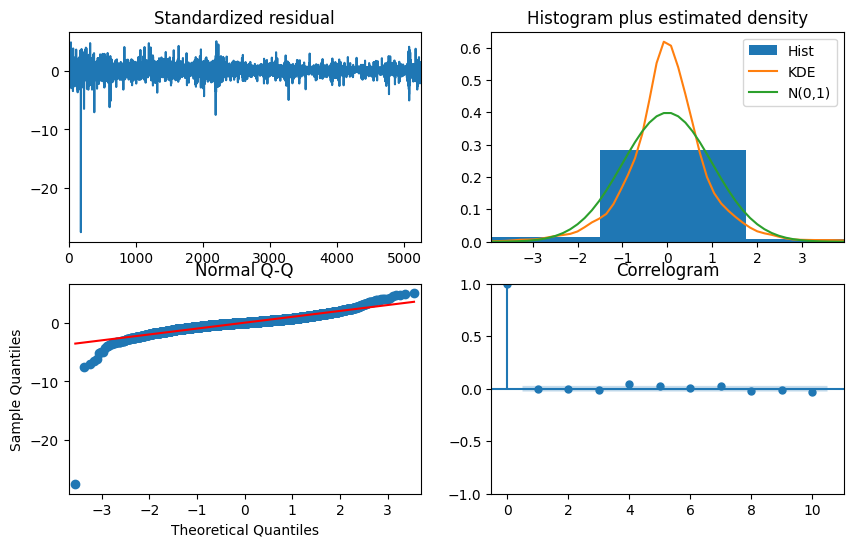

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(10,6))
plt.show()

In [ ]:
# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  # You can adjust the order as needed
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5252
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11603.049
Date:                Mon, 13 Nov 2023   AIC                         -23202.098
Time:                        16:14:46   BIC                         -23188.966
Sample:                             0   HQIC                        -23197.507
                               - 5252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0395      0.008     -5.202      0.000      -0.054      -0.025
sigma2         0.0007   2.21e-06    319.211      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.01   Jarque-

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_i

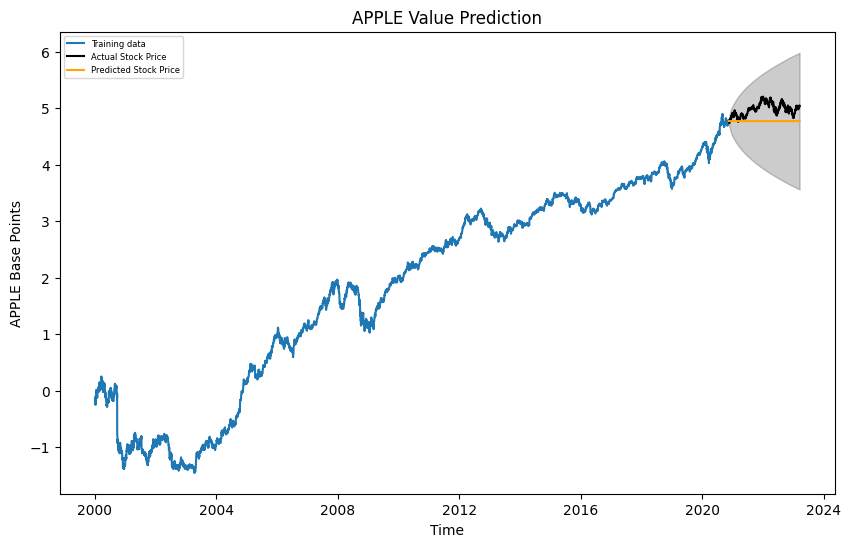

In [ ]:
# Forecast
forecast_values = fitted.forecast(steps=len(test_data), alpha=0.05)  # Match the length of test_data


# Calculate standard error manually
forecast_result = fitted.get_forecast(steps=len(test_data), alpha=0.05)
se = forecast_result.se_mean
forecast_data = pd.DataFrame({'Date': test_data.index, 'Forecast': forecast_values})

forecast_data.set_index('Date', inplace=True)

# Now create the forecast_series using the aligned data
forecast_series = forecast_data['Forecast']
# Make as pandas series
# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training data')
plt.plot(test_data, color='black' ,label='Actual Stock Price')
plt.plot(forecast_series, color='orange', label='Predicted Stock Price')
plt.title('APPLE Value Prediction')
plt.xlabel('Time')
plt.ylabel('APPLE Base Points')
plt.fill_between(test_data.index, forecast_values - 1.96 * se, forecast_values + 1.96 * se, color='k', alpha=0.2)
plt.legend(loc='upper left', fontsize=6)
plt.show()

In [ ]:
model = ARIMA(train_data, order=(1, 1, 0))  # You can adjust the order as needed
fitted = model.fit()

# Extend your time series by 30 days into the future
future_dates = pd.date_range(start='2023-01-01 00:00:00', periods=584, freq='D')

# Forecast the next 30 days
forecast_values = fitted.forecast(steps=584)

forecast_data = pd.DataFrame({'Date': future_dates, 'Forecast': forecast_values})

forecast_data.set_index('Date', inplace=True)

# Now create the forecast_series using the aligned data
forecast_series = forecast_data['Forecast']

forecast_data.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

,Forecast
Date,
2023-01-01,4.771391
2023-01-02,4.771373
2023-01-03,4.771374
2023-01-04,4.771374
2023-01-05,4.771374


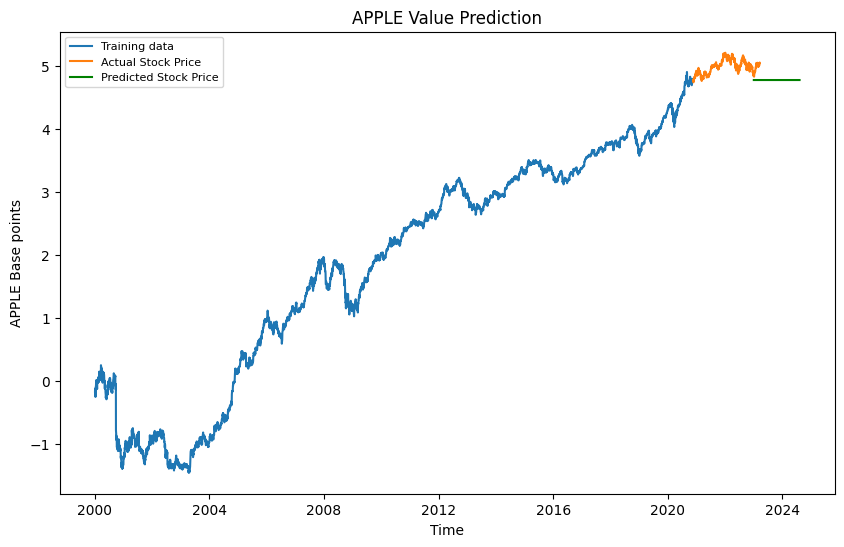

In [ ]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Training data')
plt.plot(test_data, label='Actual Stock Price')
plt.plot(forecast_series, color='green', label='Predicted Stock Price')
plt.title('APPLE Value Prediction')
plt.xlabel('Time')
plt.ylabel('APPLE Base points')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Calculate performance metrics
mse = mean_squared_error(test_data, forecast_values)
print('MSE: ' + str(mse))
mae = mean_absolute_error(test_data, forecast_values)
print('MAE: ' + str(mae))
rmse = math.sqrt(mse)
print('RMSE: ' + str(rmse))
mape = np.mean(np.abs(forecast_values.values - test_data) / np.abs(test_data.values))
print('MAPE: ' + str(mape))

MSE: 0.05534019439699283
MAE: 0.21049448266002876
RMSE: 0.23524496678354848
MAPE: 0.04182677074536441
